## Project 2: US National Park Species Data
### Alicia Bierly

1. The dataset I’m working with consists of two tables. The first table provides general information on all national parks, including details like longitude, latitude, name, state, and park name. The second table contains data on species present in each park, such as category, family, common name, scientific name, nativeness, abundance, and other attributes.

2. Source: https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity/data

3. I’m interested in this dataset because I want to examine the abundance of invasive species across U.S. national parks and identify patterns and recurring instances. I plan to compare native versus nonnative species and explore the types of species found in specific areas and ecosystems. Additionally, I aim to investigate which animals are classified under various conservation statuses. I also chose this dataset because I'm taking BIO 213 this term and thought it would be a good opportunity to apply ecology and evolutionary concepts I'm learning about to the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

file_path_parks = 'national_parks/parks.csv'
parks = pd.read_csv(file_path_parks)

file_path_species = 'national_parks/species.csv'
species = pd.read_csv(file_path_species)

display(parks.head(5))
display(species.head(5))

/var/folders/gz/wbvdwhws46d1kjxt_rfffkc00000gn/T/ipykernel_20683/1696735380.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv(file_path_species)


,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


### Exploring Non-Native Species Found in Natural Parks

<Axes: xlabel='Count', ylabel='Category'>

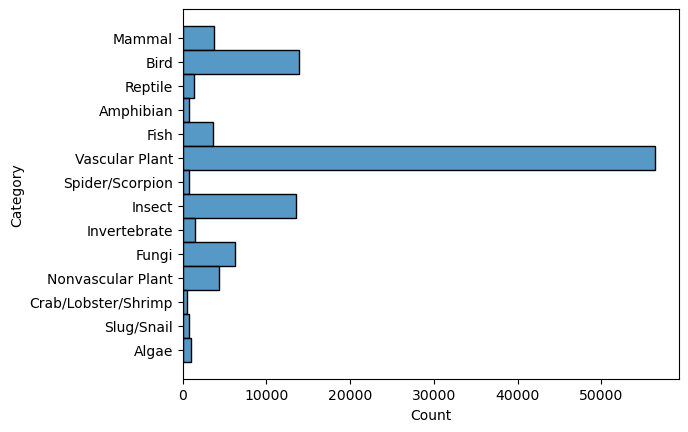

In [2]:
sns.histplot(y = species[species["Nativeness"] != "Not Native"]["Category"])#.unique()

### Looking at Specific Vascular Plant Species

<Axes: xlabel='Count', ylabel='Common Names'>

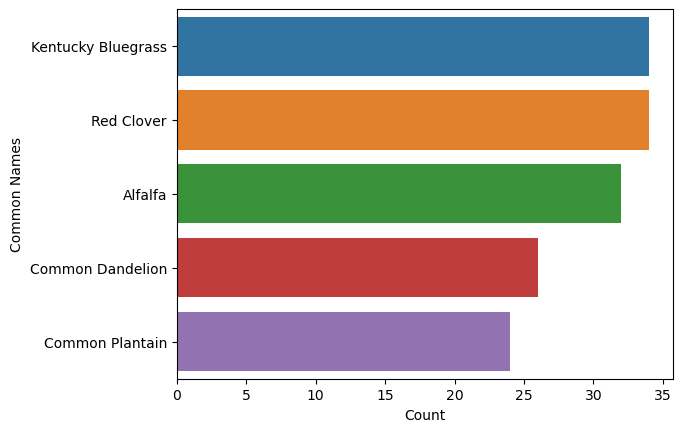

In [4]:
#sns.histplot(
counts = species[(species["Nativeness"] == "Not Native") & (species["Category"] == "Vascular Plant")].groupby("Common Names").size()#.reset_index(species["Common Names"]))
counts = pd.DataFrame({"Common Names": counts.index, "Count": counts.values}).sort_values(by="Count", ascending=False).head(5)
sns.barplot(data=counts, y='Common Names', x='Count')